# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-08 17:00:11.111176


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/7/20


,11/7/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,9860558,237113,2.40
Brazil,5653561,162269,2.87
India,8507754,126121,1.48
Mexico,961938,94808,9.86
United Kingdom,1174770,48978,4.17
Italy,902490,41063,4.55
France,1709773,40220,2.35


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/7/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
50922,US,9607336,2020-11-05,234927.0,1210.0,121888.0,94625.571429
50921,US,9485448,2020-11-04,233717.0,1097.0,102831.0,89858.857143
50920,US,9382617,2020-11-03,232620.0,1130.0,91530.0,86362.714286
50919,US,9291087,2020-11-02,231490.0,491.0,84089.0,83805.857143
50918,US,9206998,2020-11-01,230999.0,401.0,73594.0,81335.714286
50917,US,9133404,2020-10-31,230598.0,908.0,89126.0,79509.000000
50916,US,9044278,2020-10-30,229690.0,1030.0,99321.0,78738.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/7/20


,11/7/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,525608,33680.0,6.41
Texas,985061,19146.0,1.94
California,969362,17961.0,1.85
Florida,837077,17100.0,2.04
New Jersey,252582,16425.0,6.50
Illinois,477978,10488.0,2.19
Massachusetts,169576,10129.0,5.97


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/7/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1743,California,956854,2020-11-05,17860.0,52.0,5934.0,4743.714286
1742,California,950920,2020-11-04,17808.0,63.0,5519.0,4520.571429
1741,California,945401,2020-11-03,17745.0,56.0,4990.0,4359.000000
1740,California,940411,2020-11-02,17689.0,18.0,4533.0,4281.857143
1739,California,935878,2020-11-01,17671.0,12.0,3735.0,4183.142857
1738,California,932143,2020-10-31,17659.0,41.0,4115.0,4065.571429
1737,California,928028,2020-10-30,17618.0,59.0,4380.0,4175.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/7/20


,11/7/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,319977,7170.0,2.24
Orange,61743,1506.0,2.44
Riverside,70696,1333.0,1.89
San Bernardino,68242,1093.0,1.60
San Diego,59656,908.0,1.52
Sacramento,27530,508.0,1.85
San Joaquin,22635,494.0,2.18


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/7/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5526,Los Angeles,315564,2020-11-05,7140.0,23.0,2038.0,1499.142857
5525,Los Angeles,313526,2020-11-04,7117.0,20.0,1781.0,1451.000000
5524,Los Angeles,311745,2020-11-03,7097.0,21.0,1150.0,1381.142857
5523,Los Angeles,310595,2020-11-02,7076.0,2.0,1405.0,1425.857143
5522,Los Angeles,309190,2020-11-01,7074.0,3.0,1572.0,1347.142857
5521,Los Angeles,307618,2020-10-31,7071.0,15.0,1291.0,1240.142857
5520,Los Angeles,306327,2020-10-30,7056.0,12.0,1257.0,1358.000000
5519,Los Angeles,305070,2020-10-29,7044.0,4.0,1701.0,1572.142857
5518,Los Angeles,303369,2020-10-28,7040.0,13.0,1292.0,1840.428571
5517,Los Angeles,302077,2020-10-27,7027.0,27.0,1463.0,1724.000000



7 day new US cases as of 11/7/20


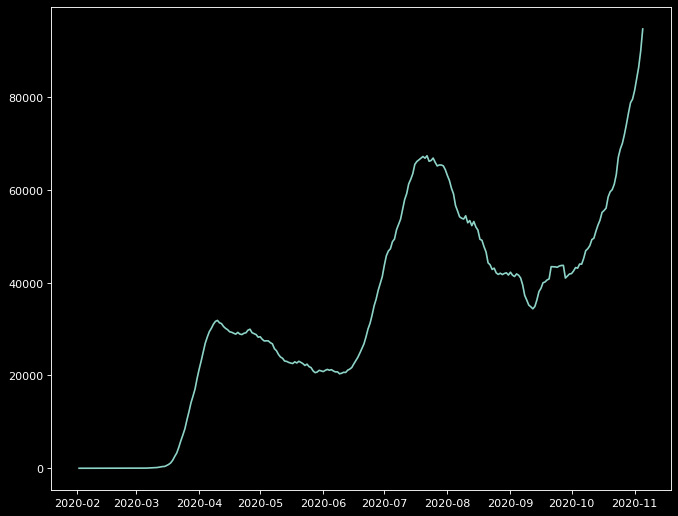

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/7/20


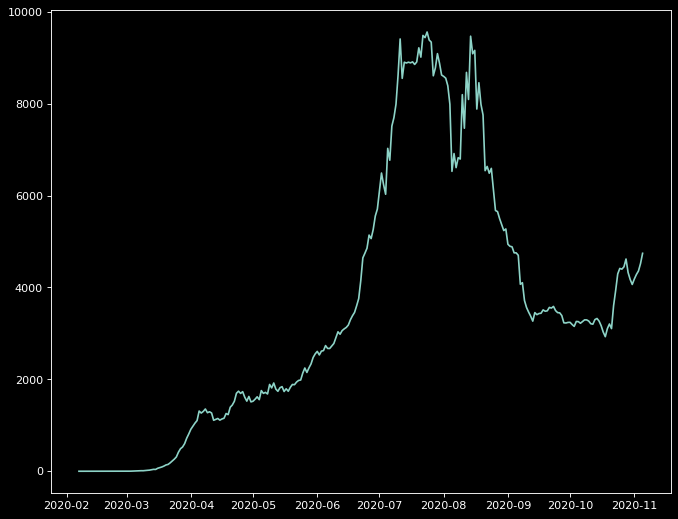

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/7/20


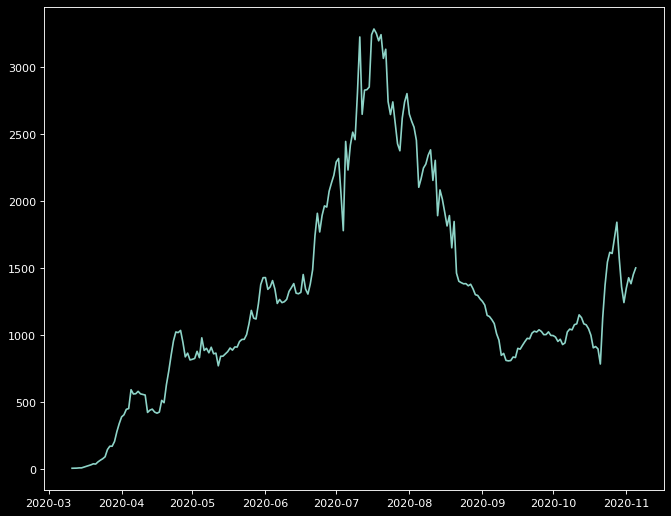

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()